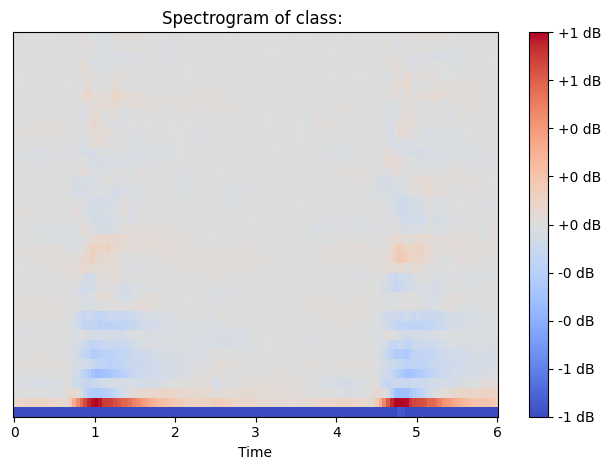

In [32]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import cv2
spectrogram = np.load("0_1-30344-A-0_1_original.npy")
spectrogram = np.expand_dims(spectrogram, axis=-1)
spectrogram = np.repeat(spectrogram, 3, axis=-1)

librosa.display.specshow(spectrogram[:,:,0], sr=44100, hop_length=2048, n_fft=4096,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of class: ')
plt.tight_layout()
plt.show()

In [33]:
def interpolate_image(image, output_shape = (224,224),interpolation = cv2.INTER_LINEAR):
    return cv2.resize(image, output_shape, interpolation = interpolation)


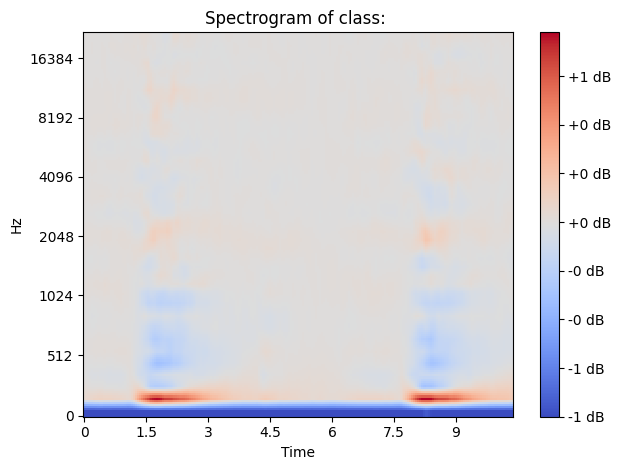

In [34]:
interpolated_spectrogram = interpolate_image(spectrogram,interpolation=cv2.INTER_LINEAR)
librosa.display.specshow(interpolated_spectrogram[:,:,0], sr=44100, hop_length=2048, n_fft=4096,x_axis='time',y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of class: ')
plt.tight_layout()
plt.show()

In [35]:
from numpy.fft import fft2, ifft2, fftshift, ifftshift, ifft


def resize_image_with_fourier(image, new_size):
    image_2d = image[:,:,0]
    fft_image = fft2(image_2d)
    fft_shifted = fftshift(fft_image)
    size_diff = np.array(new_size) - np.array(image_2d.shape)

    if np.all(size_diff >= 0):
        pad_before = size_diff // 2
        pad_after = size_diff - pad_before
        fft_resized = np.pad(fft_shifted, [(pad_before[0], pad_after[0]), (pad_before[1], pad_after[1])], mode='constant')
    else:
        crop_before = np.abs(size_diff) // 2
        crop_after = np.abs(size_diff) - crop_before
        fft_resized = fft_shifted[crop_before[0]:-crop_after[0], crop_before[1]:-crop_after[1]]
    fft_resized_shifted_back = ifftshift(fft_resized)
    resized_image = ifft2(fft_resized_shifted_back)
    resized_image_real = np.real(resized_image)
    resized_image_real = np.expand_dims(resized_image_real, axis=-1)
    resized_image_real = np.repeat(resized_image_real, 3, axis=-1)
    return resized_image_real

In [36]:
fft_interpolation = resize_image_with_fourier(spectrogram, (224,224))

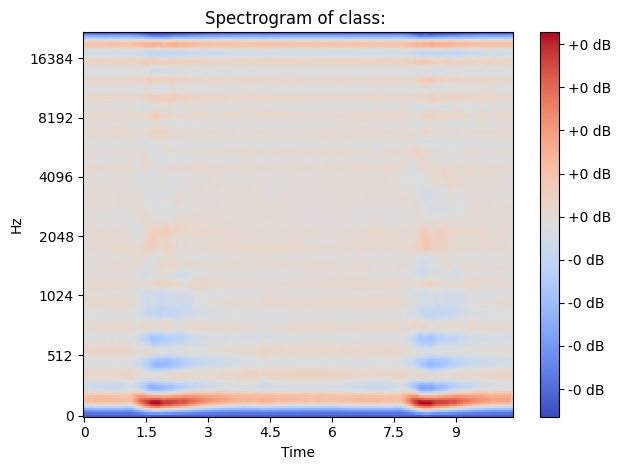

In [37]:
librosa.display.specshow(fft_interpolation[:,:,0], sr=44100, hop_length=2048, n_fft=4096,x_axis='time',y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of class: ')
plt.tight_layout()
plt.show()

In [38]:
def zero_padding_spectrogram(image, new_size=(224,224)):
    image_2d = image[:,:,0]

    pad_height = (new_size[0] - image_2d.shape[0], 0)
    pad_width = (new_size[1] - image_2d.shape[1], 0)

    pad_height = (pad_height[0] // 2, pad_height[0] - pad_height[0] // 2)
    pad_width = (pad_width[0] // 2, pad_width[0] - pad_width[0] // 2)
    min_value = np.min(image_2d)

    # Pad the spectrogram
    padded_spectrogram = np.pad(image_2d, (pad_height, pad_width), 'constant', constant_values=min_value)
    padded_spectrogram = np.expand_dims(padded_spectrogram, axis=-1)
    padded_spectrogram = np.repeat(padded_spectrogram, 3, axis=-1)
    return padded_spectrogram

In [39]:
zero_pad = zero_padding_spectrogram(spectrogram, (224,224))


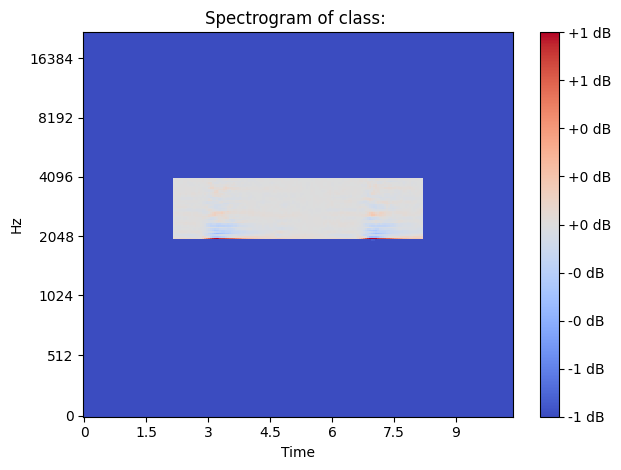

In [40]:
librosa.display.specshow(zero_pad[:,:,0], sr=44100, hop_length=2048, n_fft=4096,x_axis='time',y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of class: ')
plt.tight_layout()
plt.show()